In [27]:
import yfinance as yf
import numpy as np
import pandas as pd
from datetime import datetime, timedelta

# 1: Define Tickers and Time Range

In [28]:
# Define the list of tickers
tickers = ['SPY', # Largest SNP ETF
           'BND', # Largest Bond ETF
           'GLD', # Largest Gold ETF
           'VTI'  # Largest World index
          ]

In [29]:
# Set the end date to today
end_date = datetime.today()

# Set the start date to 2 years
start_date = end_date - timedelta(days = 4*365)

# 2: Download Close Prices

In [44]:
# Create an empy DataFrame to store the close prices
close_df = pd.DataFrame()

In [51]:
# Download the close prices for each tickers
for ticker in tickers:
    data = yf.download(ticker,
                       start = start_date,
                       end = end_date)
    close_df[ticker] = data['Adj Close']

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [52]:
close_df

,SPY,BND,GLD,VTI
Date,,,,
2019-11-29,294.889191,76.280449,137.860001,150.129959
2019-12-02,292.384216,76.080910,137.789993,148.769608
2019-12-03,290.423309,76.489037,139.110001,147.887680
2019-12-04,292.215302,76.334846,138.919998,148.844650
2019-12-05,292.740753,76.253250,139.000000,149.060440
...,...,...,...,...
2023-11-20,454.260010,70.739998,183.369995,224.789993
2023-11-21,453.269989,70.839996,185.350006,224.179993
2023-11-22,455.019989,70.900002,184.559998,225.139999


# 3: Computing Returns

In [53]:
## 3.1. Daily Returns (logarithm)
log_returns = np.log(close_df/close_df.shift(1))
log_returns.dropna(inplace = True)
log_returns

,SPY,BND,GLD,VTI
Date,,,,
2019-12-02,-0.008531,-0.002619,-0.000508,-0.009102
2019-12-03,-0.006729,0.005350,0.009534,-0.005946
2019-12-04,0.006151,-0.002018,-0.001367,0.006450
2019-12-05,0.001797,-0.001069,0.000576,0.001449
2019-12-06,0.009093,-0.001309,-0.009978,0.008835
...,...,...,...,...
2023-11-20,0.007668,0.001415,-0.001635,0.007502
2023-11-21,-0.002182,0.001413,0.010740,-0.002717
2023-11-22,0.003853,0.000847,-0.004271,0.004273


In [54]:
## 3.2. Cumulative Returns
cumulative_log_returns = log_returns.cumsum()
cumulative_log_returns

,SPY,BND,GLD,VTI
Date,,,,
2019-12-02,-0.008531,-0.002619,-0.000508,-0.009102
2019-12-03,-0.015260,0.002731,0.009026,-0.015048
2019-12-04,-0.009109,0.000713,0.007660,-0.008598
2019-12-05,-0.007312,-0.000357,0.008235,-0.007149
2019-12-06,0.001780,-0.001666,-0.001742,0.001686
...,...,...,...,...
2023-11-20,0.432070,-0.075406,0.285267,0.403665
2023-11-21,0.429888,-0.073993,0.296007,0.400948
2023-11-22,0.433742,-0.073146,0.291736,0.405221


# 4: Plot the evolution of the returns

### Log returns

<AxesSubplot:title={'center':'Cumulative returns'}, xlabel='Date'>

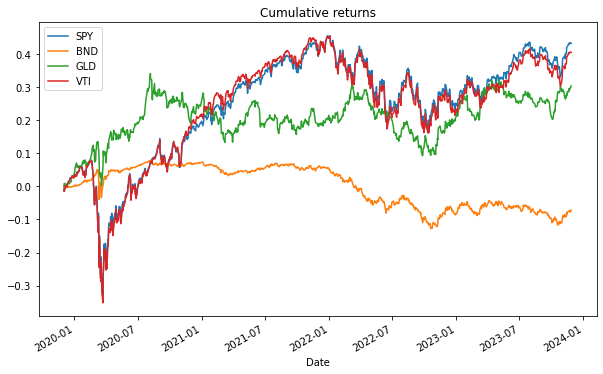

In [56]:
cumulative_log_returns.plot(title='Cumulative returns', figsize=(10, 6))

### Normal returns

<AxesSubplot:title={'center':'Cumulative returns'}, xlabel='Date'>

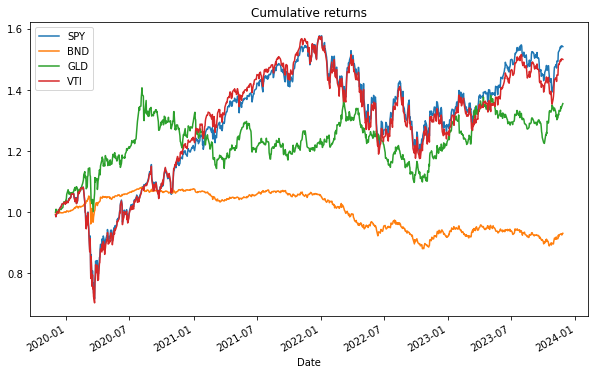

In [57]:
cumulative_normal = np.exp(cumulative_log_returns)
cumulative_normal.plot(title='Cumulative returns', figsize=(10, 6))

# 5: Acknowledgement

This tutorial has been conducted following some parts of the videos 'Intro to Python for Finance: A Beginner's Guide' and 'Portfolio Optimization in Python: Boost Your Financial Performance', by Ryan O'Connell. <br>
Videos available at: <br>

https://www.youtube.com/watch?v=9GA2WlYFeBU&ab_channel=RyanO%27Connell%2CCFA%2CFRM

https://www.youtube.com/watch?v=uOqPElBsBmM&list=PLPe-_ytPHqyg4ap7hysD4pOBJMz0mnLly&index=5&ab_channel=RyanO%27Connell%2CCFA%2CFRM